In [30]:
# !sudo apt -y install libportaudio2
# !pip install -q --use-deprecated=legacy-resolver tflite-model-maker
# !pip install -q pycocotools
# !pip install -q opencv-python-headless==4.1.2.30
# !pip uninstall -y tensorflow && pip install -q tensorflow==2.8.0

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [32]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
data = pd.read_csv("/content/drive/MyDrive/Colab Datasets/mitbih_train.csv", header=None)

In [35]:
data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [36]:
data[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

In [37]:
# Applying Undersampling
class_1 = data[data[187]==1.0]
class_2 = data[data[187]==2.0]
class_3 = data[data[187]==3.0]
class_4 = data[data[187]==4.0]
class_0 = data[data[187]==0.0].sample(n = 7000)
data = pd.concat([class_1, class_2, class_3, class_4, class_0]).sample(frac=1)

In [38]:
data[187].value_counts()

0.0    7000
4.0    6431
2.0    5788
1.0    2223
3.0     641
Name: 187, dtype: int64

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop([187], axis=1), data[187], train_size=0.8, random_state=1)

In [40]:
xtrain = np.array(xtrain).reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = np.array(xtest).reshape(xtest.shape[0], xtest.shape[1], 1)

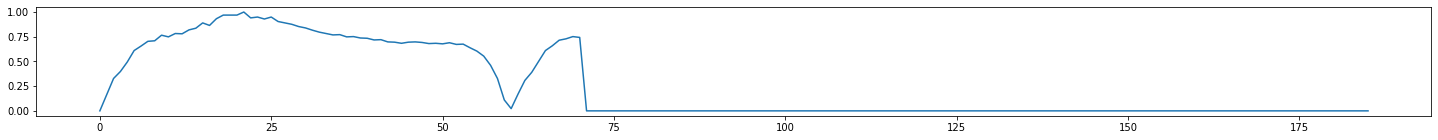

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(25,2))
ax.plot(data[data[187]==float(1)].sample(1).iloc[0,:186])

In [42]:
# weights_assigned = {0:1,1:1.5,2:1.2,3:9,4:1}

In [43]:
# model = Sequential()

# model.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation='relu', input_shape = (xtrain.shape[1],1)))
# model.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation='relu')) 
# model.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation='relu'))    
# model.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation='relu'))    
# model.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation='relu'))    
# model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
# # model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(units = 32, activation='relu'))
# # model.add(Dense(units = 1024, activation='relu'))
# model.add(Dense(units = 5, activation='softmax'))

# model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (xtrain.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dense(units = 5, activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
 history = model.fit(
    xtrain,
    ytrain,
    validation_split=0.2,
    batch_size=100,
    epochs = 100,
    # class_weight = weights_assigned,
    # callbacks=[
    #     tf.keras.callbacks.EarlyStopping(
    #         monitor='val_loss',
    #         patience=20,
    #         restore_best_weights=True
    #     )
    # ]
)

Epoch 1/100
142/142 [==============================] - 2s 14ms/step - loss: 0.5306 - accuracy: 0.8046 - val_loss: 0.2952 - val_accuracy: 0.9001
Epoch 2/100
142/142 [==============================] - 1s 9ms/step - loss: 0.2610 - accuracy: 0.9120 - val_loss: 0.2219 - val_accuracy: 0.9236
Epoch 3/100
142/142 [==============================] - 1s 9ms/step - loss: 0.1937 - accuracy: 0.9313 - val_loss: 0.2022 - val_accuracy: 0.9338
Epoch 4/100
142/142 [==============================] - 1s 9ms/step - loss: 0.1506 - accuracy: 0.9470 - val_loss: 0.1964 - val_accuracy: 0.9355
Epoch 5/100
142/142 [==============================] - 1s 9ms/step - loss: 0.1280 - accuracy: 0.9534 - val_loss: 0.1592 - val_accuracy: 0.9485
Epoch 6/100
142/142 [==============================] - 1s 9ms/step - loss: 0.1060 - accuracy: 0.9636 - val_loss: 0.1935 - val_accuracy: 0.9392
Epoch 7/100
142/142 [==============================] - 1s 9ms/step - loss: 0.0884 - accuracy: 0.9680 - val_loss: 0.1671 - val_accuracy: 0.951

In [45]:
test = pd.read_csv("/content/drive/MyDrive/Colab Datasets/mitbih_test.csv", header=None)
test=pd.DataFrame(test)

In [46]:
test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [47]:
test[187].value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64

In [48]:
# Applying Under Sampling
class_1 = test[test[187]==1.0]
class_2 = test[test[187]==2.0]
class_3 = test[test[187]==3.0]
class_4 = test[test[187]==4.0]
class_0 = test[test[187]==0.0].sample(n = 3000)
test = pd.concat([class_1, class_2, class_3, class_4, class_0]).sample(frac=1)

In [49]:
test[187].value_counts()

0.0    3000
4.0    1608
2.0    1448
1.0     556
3.0     162
Name: 187, dtype: int64

In [50]:
xtest = test.drop([187], axis=1) 
ytest = test[187]

xtest = np.array(xtest).reshape(xtest.shape[0], xtest.shape[1], 1)

In [51]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [52]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cm = confusion_matrix(y_true, prediction)

Accuracy: 95.63%


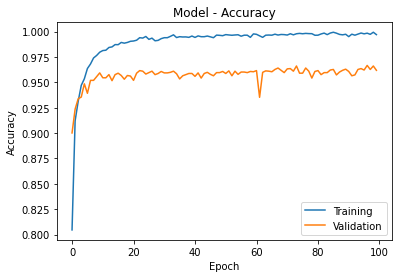

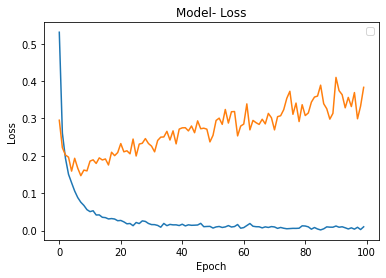

In [54]:
evaluate_model(history,xtest,ytest,model)
y_pred=model.predict(xtest)

Confusion matrix, without normalization
[[2886   44   42   23    5]
 [  71  463   18    3    1]
 [  22    7 1401   15    3]
 [  11    2   13  136    0]
 [   7    2    6    1 1592]]


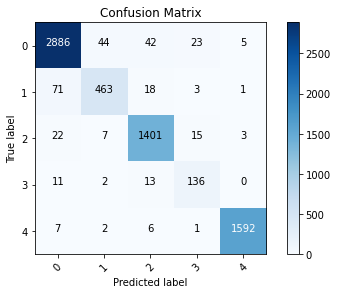

In [55]:
ytest_lbl = [np.where(i == np.max(i))[0][0] for i in y_pred]
mat = confusion_matrix(ytest, ytest_lbl)
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(mat, annot = True)

cm_plot_labels = ['0','1','2','3','4']
plot_confusion_matrix(cm=mat, classes=cm_plot_labels, title='Confusion Matrix')

In [56]:
print("Accuracy score of the predictions: {0}".format(accuracy_score(ytest_lbl, ytest)))

Accuracy score of the predictions: 0.9563035134337171


In [57]:
model.save('arrhythmia_model.h5') 

In [58]:
from sklearn.metrics import f1_score

labels = ytest
predictions = ytest_lbl
f1_score(ytest, ytest_lbl, average= None)

array([0.96248124, 0.86219739, 0.95696721, 0.8       , 0.99220941])